In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import os
import time
import pickle
import numpy as np
from matplotlib import pyplot as plt

# Functions

In [3]:

# rm saved_models/Transformers/ReverseTask/ -rf

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


def compute_avg(results):

    # compute the averages 
    results_avg = {}

    for key, _ in results.keys():
        results_avg[key] = {}

    for key in results.keys():
          for x,y in results[key].items():
              # import pdb; pdb.set_trace()
              if x in results_avg[key[0]]:
                results_avg[key[0]][x] += np.array(y)
              else: 
                results_avg[key[0]][x] = np.array(y)
        
    # num_runs = len(results.keys())//3
    num_runs =  max(j for i,j in list(results.keys()) if i=='qkv') + 1
    # compute the avg
    for key,val in results_avg.items():
          for x, y in val.items():
              y = np.array(y)
              results_avg[key][x] = y / num_runs


    return results_avg


def compute_grand_avg(grand_res):

    from copy import deepcopy

    grand_res_avg = deepcopy(grand_res[0])

    for y in grand_res[1:]:
      for model in y:
          for k,v in y[model].items():
            grand_res_avg[model][k] += v




    for model in grand_res_avg:
        for k,v in grand_res_avg[model].items():
          grand_res_avg[model][k] /= len(grand_res)

    return grand_res_avg        


In [10]:
def do_plot(results_avg):

    fig, axs = plt.subplots(1,3, figsize=(10, 4)) #, sharex=True, sharey=True)

    results_avg = {k: results_avg[k] for k in desired_order_list if k in results_avg}    
    
    idx = 0
    for key in results_avg.keys():
          tt = (results_avg[key]['train_loss_history'])

          box_size = smooth_factor_train 
          ss = smooth(tt,box_size)[box_size:-box_size]

          axs[0].plot(np.arange(len(ss)), ss, colors[idx], lw=2)
          axs[0].grid('on')

          axs[0].set(xlabel='epoch', ylabel='train loss')

          idx += 1

          # axs[0].legend(list(results_avg.keys()))         
          axs[0].legend([map_key_names[k] for k in results_avg.keys()])

    idx = 0
    for key in results_avg.keys():
          tt = (results_avg[key]['val_loss_history'])

          box_size = smooth_factor_train
          ss = smooth(tt,box_size)[box_size:-box_size]

          axs[1].plot(np.arange(len(ss)), ss, colors[idx], lw=2)
            
          axs[1].grid('on')

          axs[1].set(xlabel='epoch', ylabel='val loss')

          idx += 1



    idx = 0
    for key in results_avg.keys():
          tt = results_avg[key][acc_key]

          box_size = smooth_factor_train 
          ss = smooth(tt,box_size)[box_size:-box_size]

          axs[2].plot(np.arange(len(ss)), ss, colors[idx], lw=2)
            
            
          axs[2].grid('on')

          axs[2].set(xlabel='epoch', ylabel=acc_label)

          idx += 1


    fig.tight_layout()
    plt.show()


# fig.savefig(f'drive/MyDrive/KV_Transformer_Res/{d_dim}_{d_depth}_{h_heads}_{num_epochs}_{lr}_{sequence_length}_{which_task}_avg.png', dpi=150, format="png")


def do_plot_all(results):
    fig, axs = plt.subplots(1,2, figsize=(10,7)) #, sharex=True, sharey=True)

    idx = 0
    for key, c in results.keys():
          t_time = results[(key, c)]['time_spent']
          box_size = smooth_factor_train 
          tt = (results[(key, c)]['train_loss_history'])
          ss = smooth(tt,box_size)[box_size:-box_size]

          axs[0].plot(t_time[box_size:-box_size], ss, colors[idx//num_runs], lw=3)
          axs[0].grid('on')

          axs[0].set(title='train', xlabel='Training time (sec)', ylabel='Loss')

          idx += 1



    idx = 0
    for key, c in results.keys():
          t_time = results[(key, c)]['val_time_spent']
          box_size = smooth_factor_val 
          tt = (results[(key, c)]['val_loss_history'])
          ss = smooth(tt,box_size)[box_size:-box_size]      

          axs[1].plot(t_time[box_size:-box_size], ss, colors[idx//num_runs], lw=3)
          axs[1].grid('on')

          axs[1].set(title='test', xlabel='Training time (sec)')
          axs[1].legend([map_key_names[k] for k in results.keys()])

          idx += 1


    fig.tight_layout()
    plt.show()


    # fig.savefig(f'drive/MyDrive/KV_Transformer_Res/{d_dim}_{d_depth}_{h_heads}_{num_epochs}_{lr}_{sequence_length}_{which_task}_all.png', dpi=150, format="png")


def plot_acc(results_avg):

  # colors = ['g-.', 'b:', 'k']

  fig = plt.figure(figsize=(2,3))

  accs = []
  for (key,val), c in zip(results_avg.items(), colors):
      accs.append(results_avg[key]['test_acc']*100)

  bars = plt.bar(np.arange(len(accs)), accs)
  plt.xticks(np.arange(len(accs)), list(results_avg.keys()), rotation=90)

  # for bar,c in zip(bars, colors):
  #   bar.set_color(c)

  fig.gca().yaxis.grid(True, zorder=0,)
  plt.ylabel('Acc (%)')
  plt.ylim(0,100)
  plt.show()

  



  # fig.savefig(f'drive/MyDrive/KV_Transformer_Res/{d_dim}_{d_depth}_{h_heads}_{num_epochs}_{lr}_{sequence_length}_{which_task}_acc.png', dpi=150, format="png")    

# Main part

4_15_0.0001_128_numbers.pkl


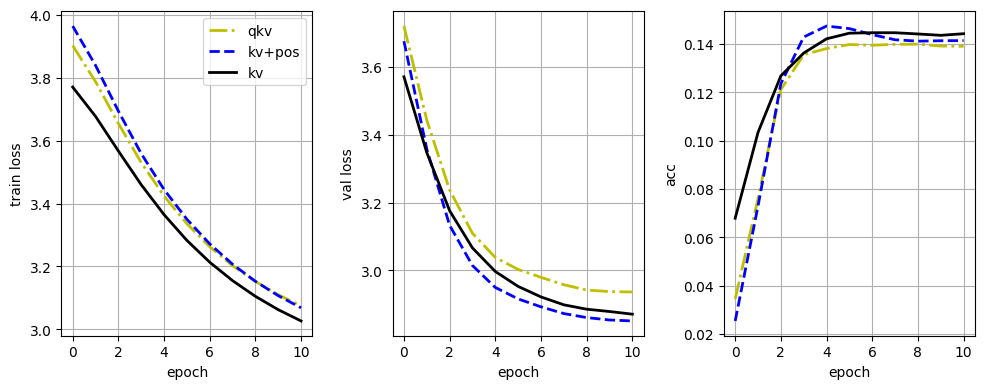

4_15_0.0001_16_numbers.pkl


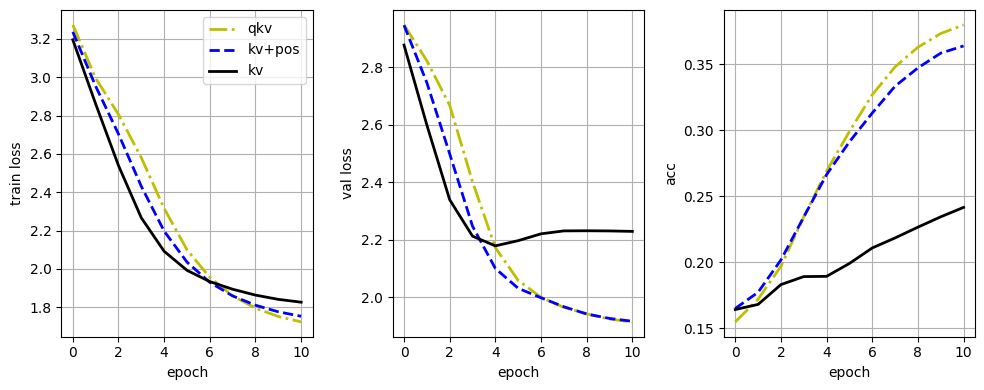

4_15_0.0001_32_numbers.pkl


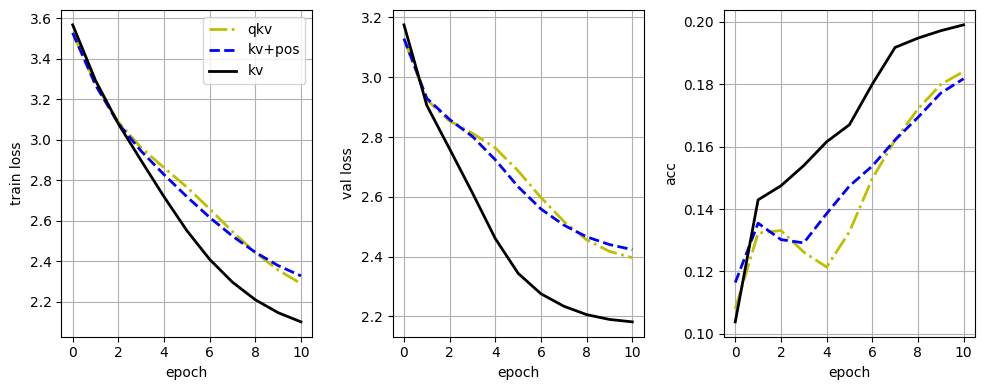

4_15_0.0001_64_numbers.pkl


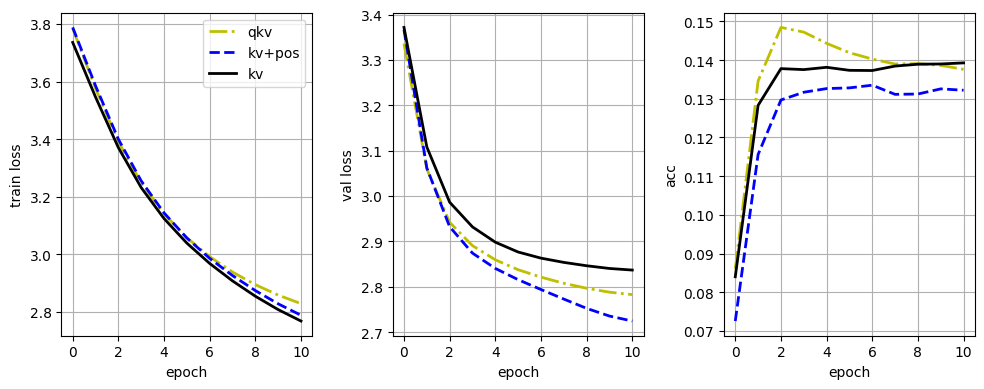

4_15_0.001_128_numbers.pkl


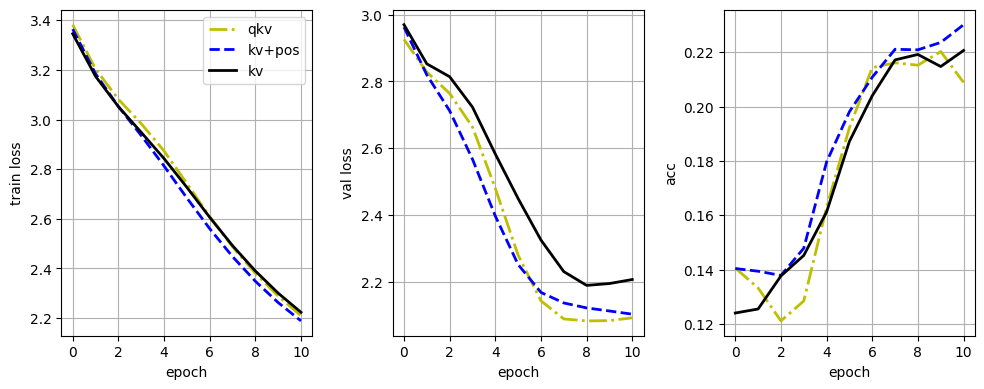

4_15_0.001_16_numbers.pkl


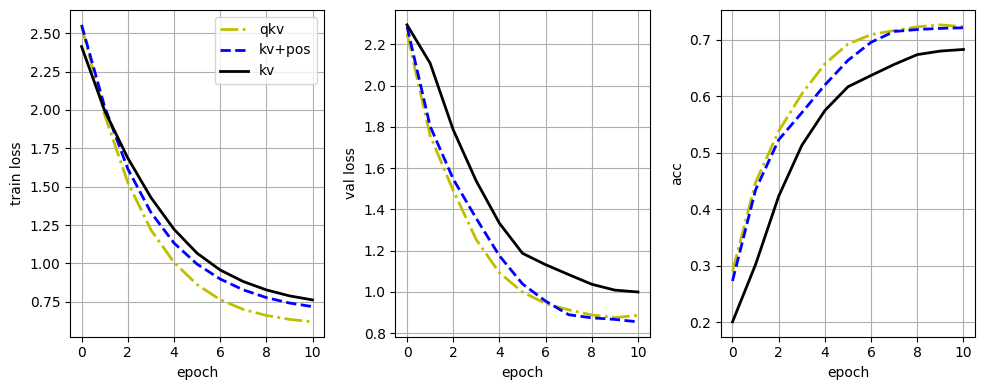

4_15_0.001_32_numbers.pkl


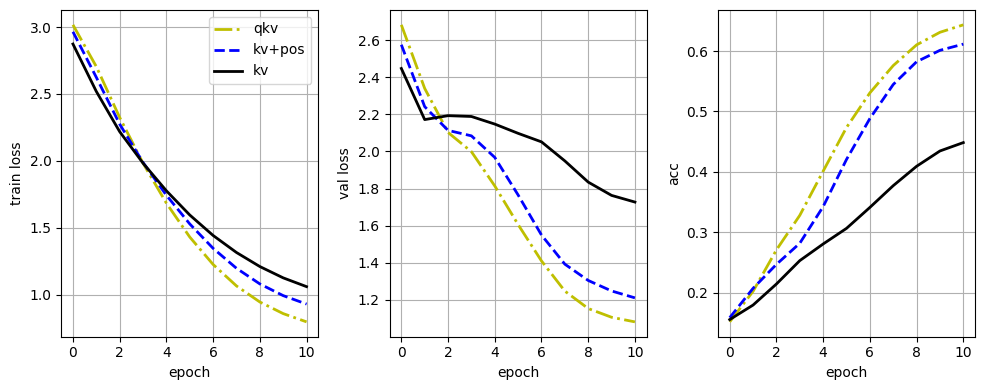

4_15_0.001_64_numbers.pkl


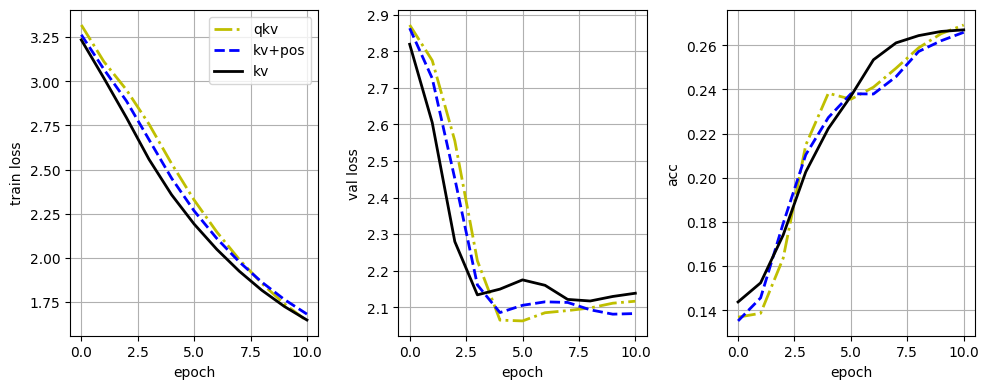

8


In [15]:
colors = ['y-.', 'b--', 'k', 'c', 'k--', 'r', 'r--']
desired_order_list = ['qkv','kv', 'kv-nopos']#, 'no-sm-sqrt', 'no-sm-std', 'no-sm-layernorm']
color_dict  = dict(zip(desired_order_list,colors))


map_key_names = {'qkv':'qkv', 'kv':'kv+pos', 'kv-nopos':'kv'}


which_db = '_numbers'
smooth_factor_train = 2
key_name = 'val'    
acc_key = 'accs_history'
acc_label = 'acc'

# which_db = 'translation_en_de'
# which_db = 'translation_de_en'
# smooth_factor_train = 2
# key_name = 'val'    
# acc_key = 'test_acc'     
# acc_label = 'bleu'


source_folder = './results_new/nlp/'
# source_folder = '/home/ali/Downloads/number_no_sqrt/'

files = os.listdir(source_folder)
files.sort()

grand_res = []

for f in files:
  if not f.endswith('.pkl') or which_db not in f: continue
  # print(f)    
  
  with open(f'{source_folder}/{f}', 'rb') as g:
      results = pickle.load(g)
      
        
  # if len(results.keys()) % 3 == 0 and len(set([i[0] for i in list(results.keys())])) == 3:
  grand_res.append(compute_avg(results))

  print(f)
  do_plot(compute_avg(results))  
  plt.show()
  



# with open(f'drive/MyDrive/KV_Transformer_Res/{d_dim}_{d_depth}_{h_heads}_{num_epochs}_{lr}_{sequence_length}_{which_task}.pkl', 'wb') as f:
#   pickle.dump(results, f)

print(len(grand_res))

In [28]:
results[('kv', 0)].keys()

dict_keys(['time_spent', 'train_loss_history', 'val_loss_history', 'val_time_spent', 'test_acc'])

In [29]:
# for x in grand_res:
#   do_plot(x)
#   plot_acc(x)

In [30]:
# files.sort()

In [31]:
# files

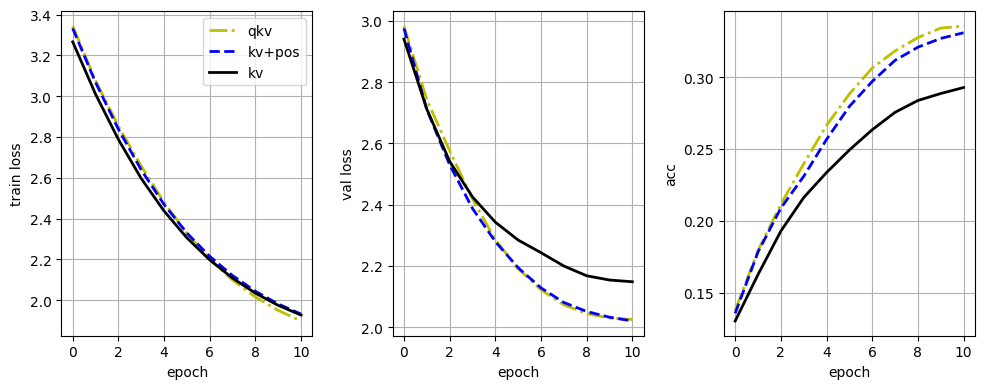

In [16]:
grand_res_avg = compute_grand_avg(grand_res)

do_plot(grand_res_avg)
# plot_acc(grand_res_avg)

In [60]:
# grand_res_avg

In [123]:
num_models

10